# Prediction using Unsupervised ML (Level - Beginner)
>### In this task, I predicting the optimum number of clusters and represent it visually, from the given ‘Iris’ dataset.

### Author : Shreeram Sandeep Geedh

### Used libraries in this notebook:
>#### Pandas :
>> Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
>#### Numpy :
>> NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.
>#### Seaborn :
>> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
>#### Matplotlib :
>> Matplotlib is a plotting library. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
>#### scikit-learn :
>> Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.

### Step:1--> Importing all libraries which required in this notebook

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import lux

import matplotlib.pyplot as plt

from sklearn import datasets

### Step:2--> Reading data from csv file

In [2]:
path = "Iris.csv"
data = pd.read_csv(path)

In [3]:
data.head()

C:\Users\srgam\anaconda3\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

#### Chaking NaN values
> NaN, standing for not a number, is a numeric data type used to represent any value that is undefined or unpresentable.

> NaN is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [5]:
print(data.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64



<ipython-input-5-d3edf7b318e8>:1: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


In [6]:
data.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

##### Checking unique classes in dataset 

In [7]:
data.Species.nunique()

3

In [8]:
data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
dtype: int64


C:\Users\srgam\anaconda3\lib\site-packages\IPython\lib\pretty.py:700: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


### Step:2--> visualization

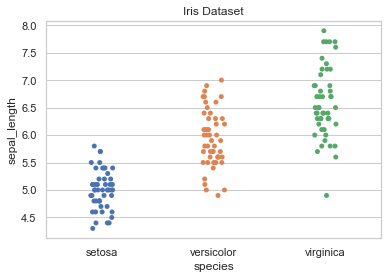

In [9]:
sns.set(style= 'whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x = 'species',y = 'sepal_length', data = iris)
plt.title('Iris Dataset')
plt.show()

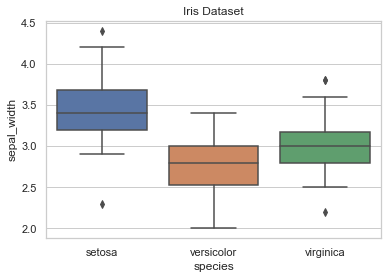

In [10]:
sns.boxplot(x = 'species', y = 'sepal_width',data = iris)
plt.title('Iris Dataset')
plt.show()

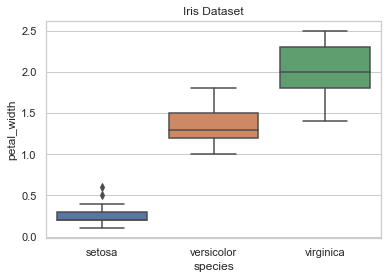

In [11]:
sns.boxplot(x = 'species', y = 'petal_width',data = iris)
plt.title('Iris Dataset')
plt.show()

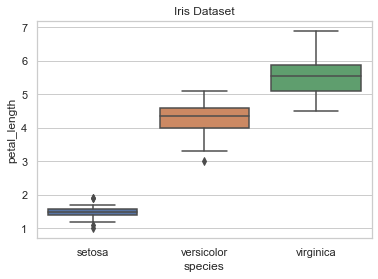

In [12]:
sns.boxplot(x = 'species', y = 'petal_length',data = iris)
plt.title('Iris Dataset')
plt.show()

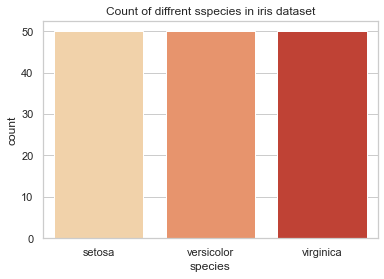

In [13]:
sns.countplot(x = 'species', data = iris, palette="OrRd")
plt.title("Count of diffrent sspecies in iris dataset")
plt.show()

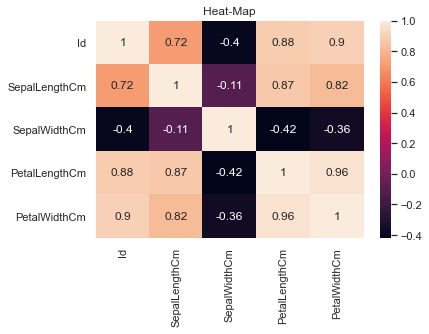

In [14]:
#HeatMap
sns.heatmap(data.corr(), annot = True)
plt.title("Heat-Map")
plt.show()

### Step:3--> Finding optimum number of clustering using k-means clustering algorithm 

In [15]:
x = data.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(init="k-means++", n_clusters=i, n_init=10, max_iter=300, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print('k:', i, "wcss:",  kmeans.inertia_)

C:\Users\srgam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


k: 1 wcss: 281831.54466666654
k: 2 wcss: 70581.3808
k: 3 wcss: 31320.711199999994
k: 4 wcss: 17758.792503556186
k: 5 wcss: 11468.968747023802
k: 6 wcss: 7921.863473076923
k: 7 wcss: 5911.632365518538
k: 8 wcss: 4541.979023391812
k: 9 wcss: 3571.911095588236
k: 10 wcss: 2943.9331008403374


<function matplotlib.pyplot.show(close=None, block=None)>

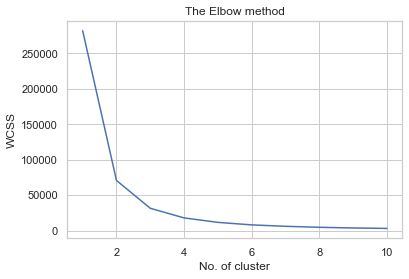

In [16]:
#ploting the results
plt.plot(range(1,11),wcss)
plt.title("The Elbow method")
plt.xlabel("No. of cluster")
plt.ylabel("WCSS")
plt.show

### Step:4--> Initializing K-means with the optimum number of clusters & Prdicting the values 

In [17]:
# Fitting the Kmean in the data
kmeans = KMeans(init="k-means++", n_clusters = 3, n_init=10, max_iter=300, random_state=0)

# Returns a lable for each data point based on the number of cluster
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Step:5--> Visualizing the Clusters

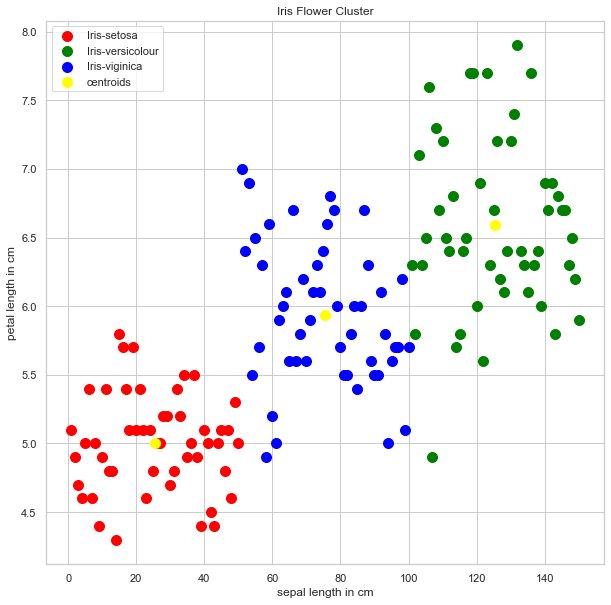

In [18]:
# Visualizing the Clusters
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100, c='red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100, c='green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100, c='blue', label = 'Iris-viginica')

#ploting centroids of clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='centroids')
plt.title('Iris Flower Cluster')
plt.xlabel('sepal length in cm')
plt.ylabel('petal length in cm')
plt.legend()
plt.show()